# Linear regression with numpy(ANN)
### https://bit.ly/3hzzFoM

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(5)
N = 1000
x1 = np.random.rand(N)
x2 = np.random.rand(N)

In [3]:
w1_true = 3
w2_true = 5
b_true = 10

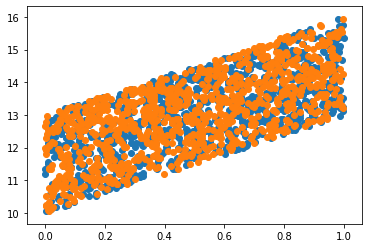

In [4]:
y_true = (x1 * w1_true) + (x2 * w1_true) + b_true

plt.scatter(x2, y_true)
plt.scatter(x1, y_true)

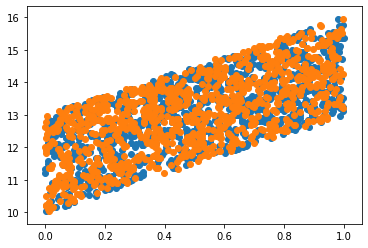

In [5]:
noise = np.random.normal(scale=0.01, size=[N])

y_true = (x1 * w1_true) + (x2 * w1_true) + b_true + noise

plt.scatter(x2, y_true)
plt.scatter(x1, y_true)

In [6]:
import pandas as pd

pd.DataFrame({'x1': x1, 'x2': x2, 'y_true': y_true}).corr()

,x1,x2,y_true
x1,1.000000,-0.032995,0.696705
x2,-0.032995,1.000000,0.693931
y_true,0.696705,0.693931,1.000000


In [7]:
w1 = np.random.normal()
w2 = np.random.normal()
w1, w2

(-0.8057028036075286, -0.9040596890537971)

In [8]:
b = np.random.normal()

In [9]:
y_pred = lambda w1, w2, x1, x2, b: (x1 * w1) + (x2 * w1) + b

## Loss function and its derivative is taken from:
## https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html
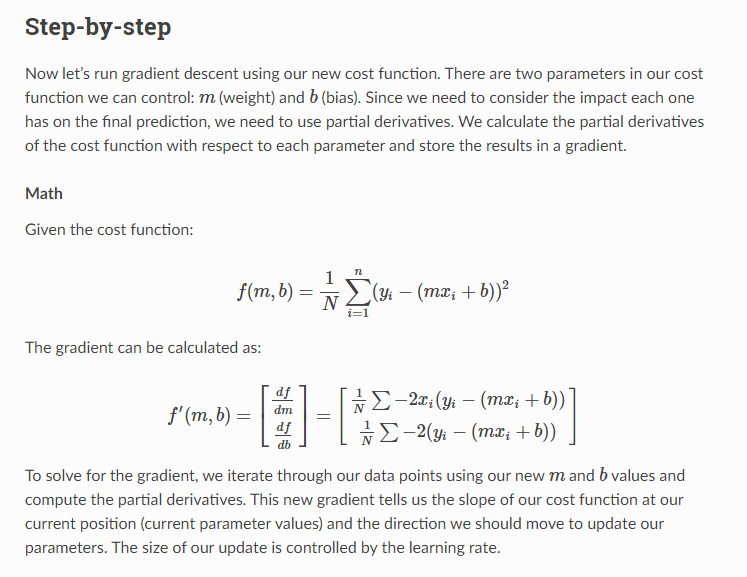

## New weights
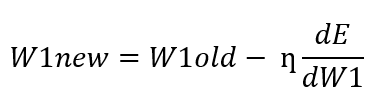

In [10]:
# It have only single layer i.e input -> hidded1 -> output
def train(no_of_data_pt, y_true, w1, w2, x1, x2, b, learning_rate, epochs):

    for i in range(epochs):

        # minimum of loss function are calculated by finding the gradient(dE/dW, E is loss function)(gradient finded)
        gradient_w1 = (1 / no_of_data_pt) * sum(((-2 * x1) * (y_true - y_pred(w1, w2, x1, x2, b))))
        gradient_w2 = (1 / no_of_data_pt) * sum(((-2 * x2) * (y_true - y_pred(w1, w2, x1, x2, b))))
        gradient_b = (1 / no_of_data_pt) * sum(((-2) * (y_true - y_pred(w1, w2, x1, x2, b))))

        # Updating old weight
        w1 = w1 - (gradient_w1 * learning_rate)
        w2 = w2 - (gradient_w2 * learning_rate)
        b = b - (gradient_b * learning_rate)

        return w1, w2, b

In [11]:
predict = lambda w1, w2, x1, x2, b: (x1 * w1) + (x2 * w1) + b

In [12]:
# for i in np.arange(0.3,0.4,0.001):
w1_p, w2_p, b_p = train(no_of_data_pt=N,
                        y_true=y_true,
                        w1=w1,
                        w2=w2,
                        x1=x1,
                        x2=x2,
                        b=b,
                        learning_rate=0.353,
                        epochs=10)
#     print(i,w1_p, w2_p, b_p)

w1, w2, b

(-0.8057028036075286, -0.9040596890537971, 0.762626118840717)

In [13]:
yp = predict(w1_p, w2_p, x1, x2, b_p)

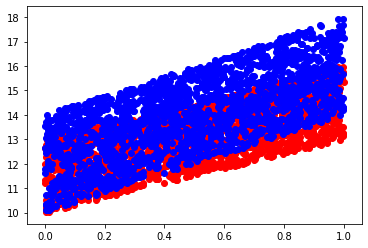

In [14]:
plt.scatter(x1, y_true, color='red')  #true data
plt.scatter(x2, y_true, color='red')  #true data
plt.scatter(x1, yp, color='blue')  # predicted data
plt.scatter(x2, yp, color='blue')  # predicted data

# Important Conclusion

 - **Learning rate is very important. It will decide whether model will learn or not.**
 
 Try to set learning-rate to 0.1 and see new weights and biases